```bash
gcloud compute scp instance-20260103-173043:/home/antonio/MDT2021S003/*.txt . --zone=us-central1-f
```

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# from IPython.core.display import display_pretty

# Info dataframe

In [3]:
# Define the data dictionary
data = {
    'Training': [149.65, 289, 556, 307, 249, 271, 285],
    'Development': [9.89, 19, 38, 23, 15, 20, 18],
    'Test': [20.64, 43, 86, 49, 37, 52, 34]
}

# Define the row labels (index)
index_labels = [
    'Duration (h)',
    '#Sample',
    '#Speaker',
    '#Male',
    '#Female',
    '#Northern',
    '#Southern'
]

# Create the DataFrame
df = pd.DataFrame(data, index=index_labels)

# Display the DataFrame
print(df)

              Training  Development   Test
Duration (h)    149.65         9.89  20.64
#Sample         289.00        19.00  43.00
#Speaker        556.00        38.00  86.00
#Male           307.00        23.00  49.00
#Female         249.00        15.00  37.00
#Northern       271.00        20.00  52.00
#Southern       285.00        18.00  34.00


In [8]:
df["Training"]["#Male"] + df["Training"]["#Female"], df["Training"]["#Northern"] + df["Training"]["#Southern"]

(np.float64(556.0), np.float64(556.0))

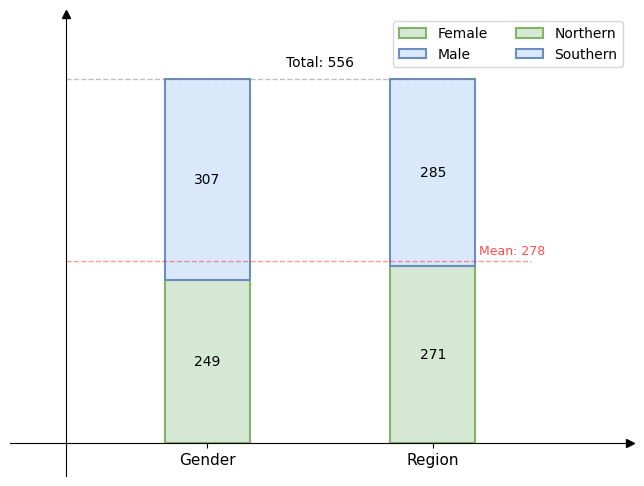

In [74]:
# 1. DADOS (Training)
# Coluna Gênero
n_female = 249
n_male = 307
total = n_female + n_male # 556

# Coluna Região (Northern / Southern)
n_northern = 271
n_southern = 285
# Nota: 271 + 285 também dá 556 (o total bate)

# 2. CONFIGURAÇÕES DE POSIÇÃO
width = 0.3         # Largura das barras
pos_gender = 0.5    # Posição X da barra de Gênero
pos_region = 1.3    # Posição X da barra de Região (ao lado)

fig, ax = plt.subplots(figsize=(8, 6))

# --- BARRA 1: GÊNERO (Gender) ---
# Parte de baixo (Female)
p1 = ax.bar(pos_gender, n_female, width=width, label='Female', 
            color='#d5e8d4', edgecolor='#82b366', linewidth=1.5)
# Parte de cima (Male)
p2 = ax.bar(pos_gender, n_male, width=width, bottom=n_female, label='Male', 
            color='#dae8fc', edgecolor='#6c8ebf', linewidth=1.5)

# --- BARRA 2: REGIÃO (Region) ---
# Parte de baixo (Northern)
p3 = ax.bar(pos_region, n_northern, width=width, label='Northern', 
            color='#d5e8d4', edgecolor='#82b366', linewidth=1.5)
# Parte de cima (Southern)
p4 = ax.bar(pos_region, n_southern, width=width, bottom=n_northern, label='Southern', 
            color='#dae8fc', edgecolor='#6c8ebf', linewidth=1.5)


# 3. TEXTOS DENTRO DAS BARRAS (Rótulos de Valor)
# --- Gênero ---
ax.text(pos_gender, n_female/2, str(n_female), ha='center', va='center')
ax.text(pos_gender, n_female + n_male/2, str(n_male), ha='center', va='center')

# --- Região ---
ax.text(pos_region, n_northern/2, str(n_northern), ha='center', va='center')
ax.text(pos_region, n_northern + n_southern/2, str(n_southern), ha='center', va='center')

# Texto do Total (comum às duas)
ax.text((pos_gender + pos_region)/2, total + 15, f"Total: {total}", 
        ha='center', va='bottom', fontsize=10)


# 4. LINHA PONTILHADA DO TOTAL
# Desenha uma linha do eixo Y até cobrir as duas barras
# Começa em x=0 e vai até a borda direita da segunda barra
x_end_line = pos_region + (width/2)
ax.plot([0, x_end_line], [total, total], linestyle='--', color='gray', linewidth=1, alpha=0.5)

# 5. TRAÇANDO A MÉDIA
mean_val = int(total / 2)  # Média entre os totais (pode ser ajustada conforme necessário)
x_end_mean = pos_region + (width/2) + 0.2 
ax.plot([0, x_end_mean], [mean_val, mean_val], 
        color='red', linestyle="--", linewidth=1, label=None, alpha=0.4)

ax.text(x_end_mean + 0.05, mean_val + 5, f"Mean: {mean_val}", 
        color='red', fontsize=9, va='bottom', ha='right', alpha=0.7)

# 6. AJUSTES DO EIXO (Estilo Cartesiano)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Setas nos eixos
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

# Configurar Rótulos do Eixo X para identificar as colunas
ax.set_xticks([pos_gender, pos_region])
ax.set_xticklabels(['Gender', 'Region'], fontsize=11)

# Remover ticks do Y para limpeza
ax.set_yticks([])

# Limites
plt.xlim(-0.2, 2.0) 
plt.ylim(-50, total + 100)

# Legenda (Movemos para fora ou topo para não cobrir)
plt.legend(loc='upper right', frameon=True, ncol=2)
# plt.title("Training Set: Gender vs Region Distribution", pad=20)

plt.savefig("imgs/magicdata_train_distri.png", dpi=300, bbox_inches='tight')
plt.show()

# Utterances

In [88]:
topics = [
    'Humanidades', 'Entretenimento', 'Esportes', 'Militar', 'Finanças e Economia',
    'Religião', 'Vida Familiar', 'Política e Direito', 'Educação e Saúde',
    'Dispositivos Digitais', 'Clima e Meio Ambiente', 'Ciência e Tecnologia',
    'Desenvolvimento Profissional', 'Arte', 'Vida Cotidiana'
]

# Valores de #Sample
samples = [22, 1, 32, 4, 5, 1, 6, 4, 53, 39, 13, 11, 35, 84, 41]

# Valores de Duration (h)
durations = [11.46, 0.52, 16.62, 1.98, 2.49, 0.52, 1.48, 2.07, 27.30, 
             20.14, 6.62, 5.66, 18.26, 43.87, 21.19]

df_topics = pd.DataFrame({
    '#Amostras': samples,
    'Duração (h)': durations
}, index=topics)

df_topics = df_topics.loc[[
    'Humanidades', 'Entretenimento', 'Esportes', 'Militar', 'Finanças e Economia',
    'Vida Familiar', 'Política e Direito', 'Educação e Saúde', 'Religião',
    'Dispositivos Digitais', 'Clima e Meio Ambiente', 'Ciência e Tecnologia',
    'Desenvolvimento Profissional', 'Arte', 'Vida Cotidiana'
]]


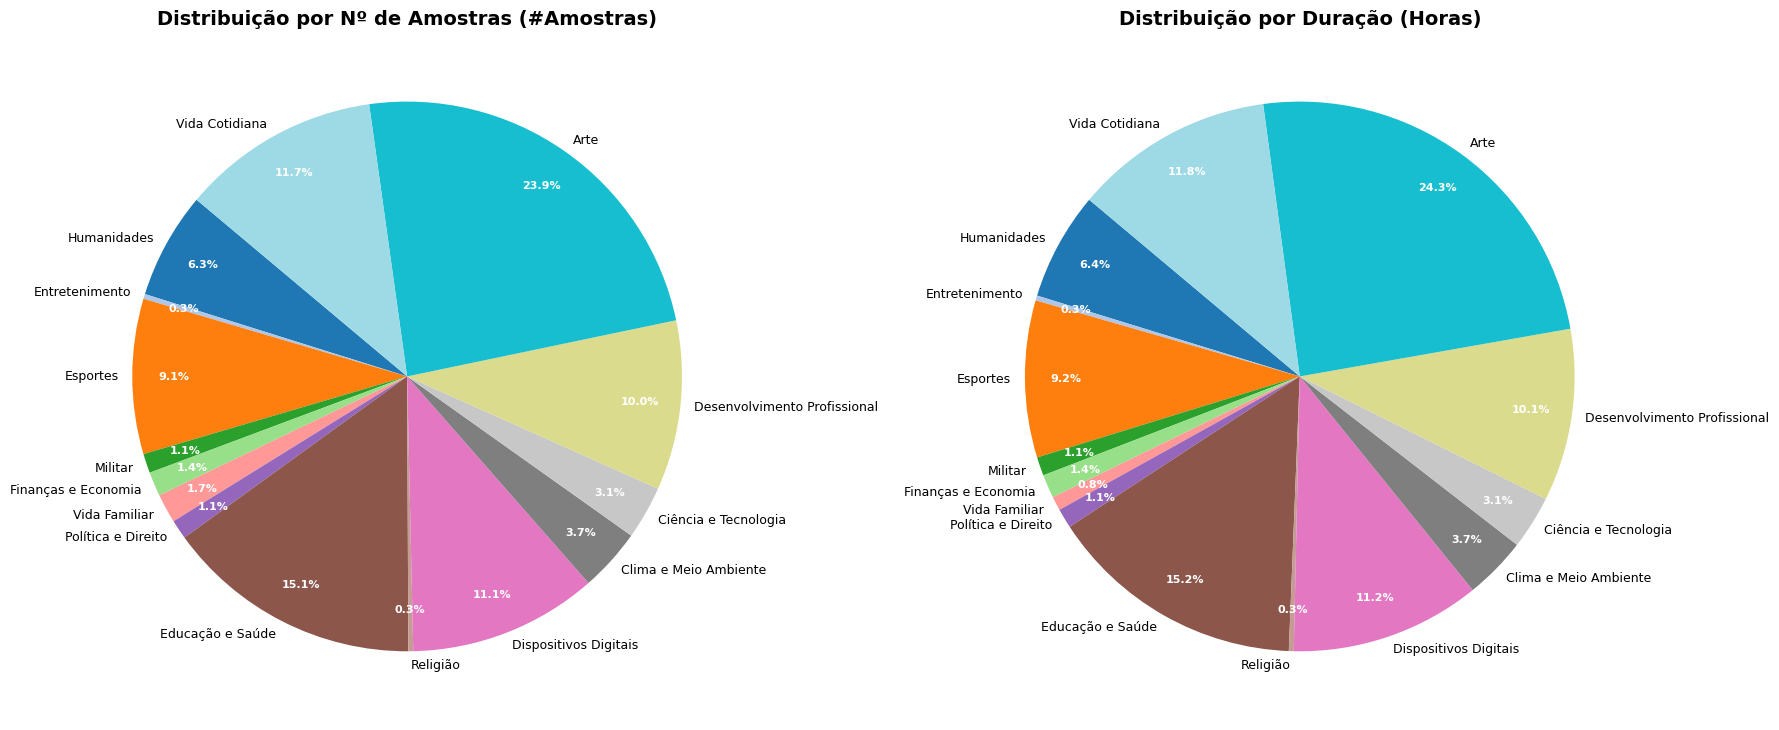

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# Gerar cores baseadas no tamanho do DataFrame atual
# Usamos numpy para garantir que temos cores suficientes mapeadas
cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, len(df_topics)))

# --- Gráfico 1: Número de Amostras (#Amostras) ---
# Usamos df_topics['#Amostras'] para valores e df_topics.index para rótulos
wedges1, texts1, autotexts1 = ax1.pie(
    df_topics['#Amostras'], 
    labels=df_topics.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    pctdistance=0.85, 
    labeldistance=1.05
)
ax1.set_title("Distribuição por Nº de Amostras (#Amostras)", fontsize=14, fontweight='bold')

# --- Gráfico 2: Duração em Horas (Duration) ---
# Usamos df_topics['Duração (h)']
wedges2, texts2, autotexts2 = ax2.pie(
    df_topics['Duração (h)'], 
    labels=df_topics.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    pctdistance=0.85, 
    labeldistance=1.05
)
ax2.set_title("Distribuição por Duração (Horas)", fontsize=14, fontweight='bold')

# 3. Ajustes de Estilo (Textos)
for text in texts1 + texts2:
    text.set_fontsize(9)
    
for autotext in autotexts1 + autotexts2:
    autotext.set_fontsize(8)
    autotext.set_color('white')
    autotext.set_weight('bold')

plt.tight_layout()
plt.savefig("imgs/magicdata_topics_distri.png", dpi=300, bbox_inches='tight')
plt.show()

---

In [75]:
spkinfo = pd.read_csv("/home/antonio-moreira/Documents/my-masters-degree/notebooks/datasets/MagicData-RAMC/MagicData-RAMC/MDT2021S003/SPKINFO.txt", sep="\t")
spkinfo.head(20)
spkinfo = spkinfo.sort_values("SPEAKER_ID").reset_index(drop=True)
spkinfo.iloc[70:75]

spkinfo_slice = spkinfo.iloc[70:75].reset_index(drop=True)


latex_table = spkinfo_slice.to_latex(index=False)
print(latex_table)
# with open("spkinfo_slice.tex", "w", encoding="utf-8") as f:
#     f.write(latex_table)
# latex_table
spkinfo_slice

\begin{tabular}{llllll}
\toprule
CHANNEL & SPEAKER_ID & GENDER & AGE & REGION,CITY & DEVICE \\
\midrule
C0 & G00000075 & M & Middle-aged and young people & Sichuan & Mobile phone \\
C0 & G00000076 & F & Middle-aged and young people & Sichuan & Mobile phone \\
C0 & G00000077 & F & Middle-aged and young people & Shanxi & Mobile phone \\
C0 & G00000078 & M & Middle-aged and young people & Shanxi & Mobile phone \\
C0 & G00000079 & M & Middle-aged and young people & Hunan & Mobile phone \\
\bottomrule
\end{tabular}



,CHANNEL,SPEAKER_ID,GENDER,AGE,"REGION,CITY",DEVICE
0,C0,G00000075,M,Middle-aged and young people,Sichuan,Mobile phone
1,C0,G00000076,F,Middle-aged and young people,Sichuan,Mobile phone
2,C0,G00000077,F,Middle-aged and young people,Shanxi,Mobile phone
3,C0,G00000078,M,Middle-aged and young people,Shanxi,Mobile phone
4,C0,G00000079,M,Middle-aged and young people,Hunan,Mobile phone


In [78]:
spkinfo["AGE"].value_counts()

AGE
Middle-aged and young people    663
Name: count, dtype: int64

In [30]:
utterance = pd.read_csv("./datasets/MagicData-RAMC/UTTERANCEINFO.txt", sep="\t")
utterance.iloc[4:8]

,CHANNEL,UTTRANS_ID,SPEAKER_ID-1,SPEAKER_ID-2,TOPIC,VALID(min),TOTAL(min),Environment
4,C0,CTS-CN-F2F-2019-11-15-370.wav,G00000076,G00000075,艺术美术,26.80,31.63,室内
5,C0,CTS-CN-F2F-2019-11-15-1415.wav,G00000086,G00000087,数码产品,27.84,32.09,室内
6,C0,CTS-CN-F2F-2019-11-15-649.wav,G00000088,G00000089,气候环境,27.55,31.02,室内
7,C0,CTS-CN-F2F-2019-11-15-503.wav,G00000182,G00000569,衣食住行,28.52,31.05,室内
